In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [6]:
y=iris['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [8]:
print(X_train)
print(y_train)

     sepal length  sepal width  petal length  petal width
58            6.6          2.9           4.6          1.3
97            6.2          2.9           4.3          1.3
129           7.2          3.0           5.8          1.6
114           5.8          2.8           5.1          2.4
146           6.3          2.5           5.0          1.9
..            ...          ...           ...          ...
113           5.7          2.5           5.0          2.0
64            5.6          2.9           3.6          1.3
15            5.7          4.4           1.5          0.4
125           7.2          3.2           6.0          1.8
9             4.9          3.1           1.5          0.1

[120 rows x 4 columns]
[1 1 2 2 2 0 2 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2
 0 1 1 0 2 2 2 2 2 0 1 2 1 0 2 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0
 0 1 0 0 2 1 0 0 0 1 0 1 0 1 2 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0
 1 0 2 2 2 1 0 2 0]


In [9]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier=DecisionTreeClassifier(max_depth=2)

In [10]:
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

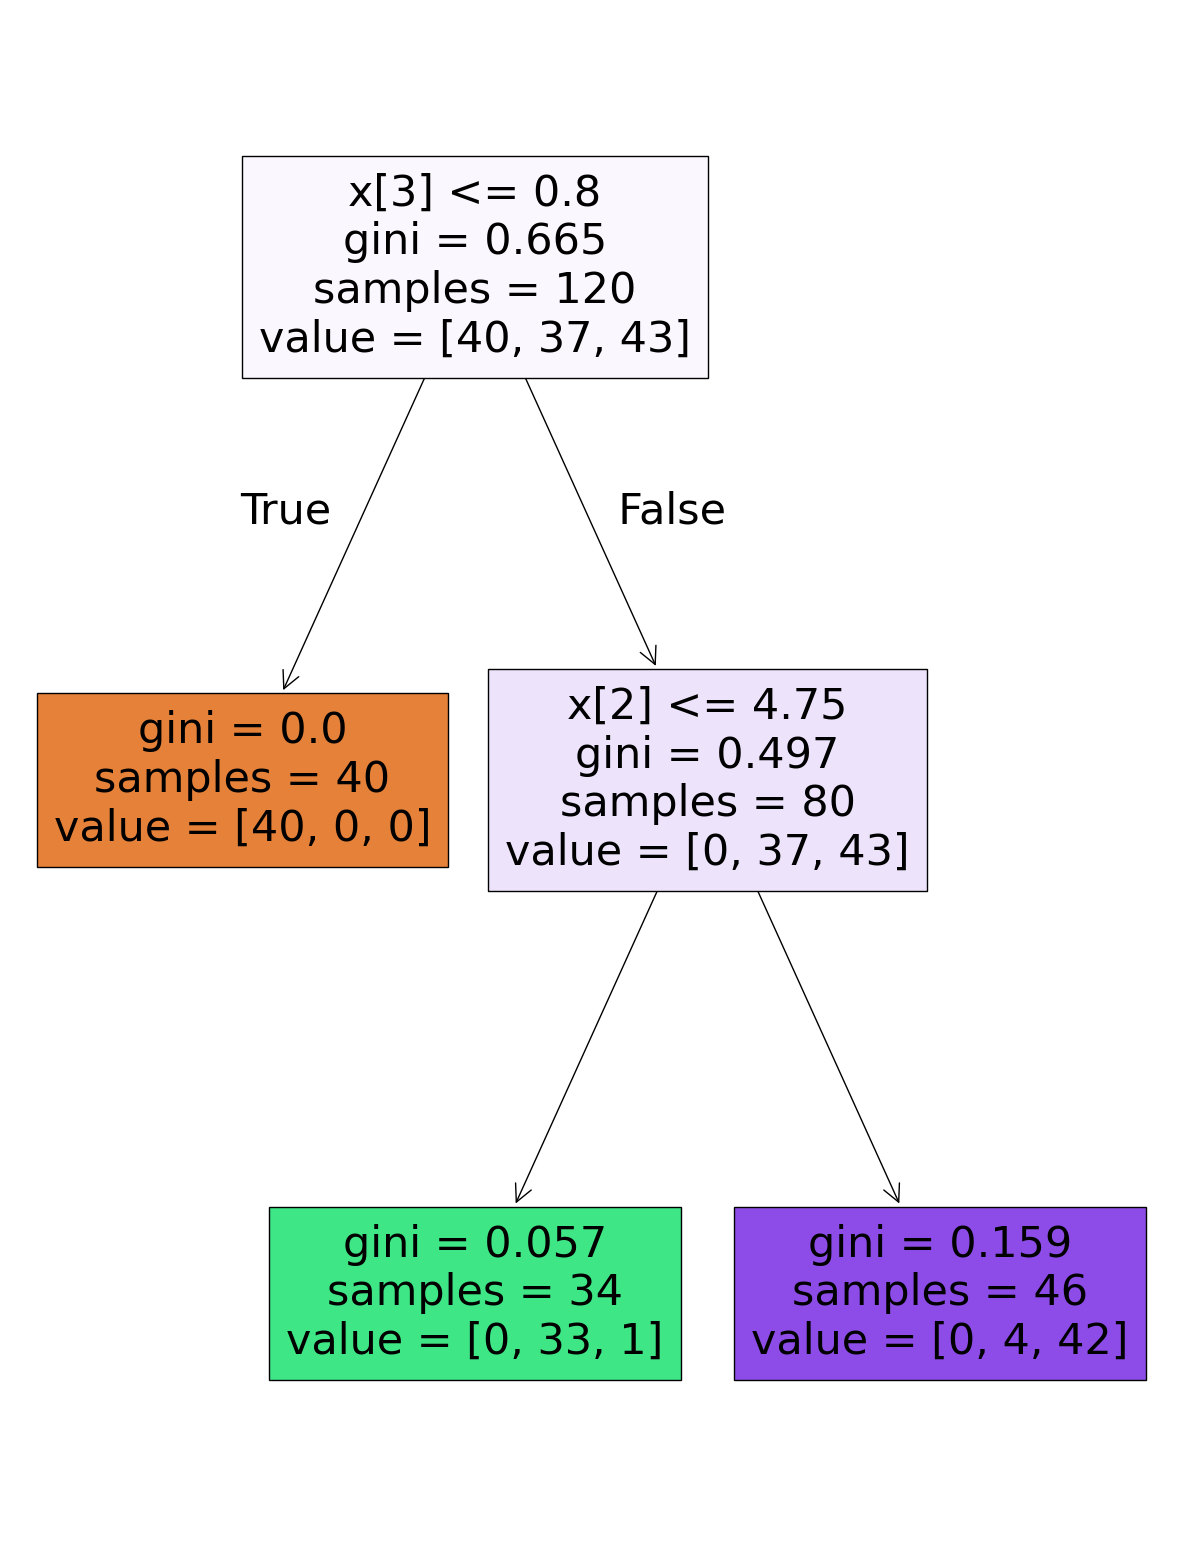

In [11]:
## visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(treeClassifier,filled=True)
plt.show()


In [12]:
y_pred=treeClassifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [15]:
print(cm)
print(cr)

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



# Decision tree classfifer Prepruning and hyperparameter tuning

In [16]:
params={
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':["best","random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto","sqrt","log2"]
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
treemodel=DecisionTreeClassifier()

In [19]:
grid=GridSearchCV(treemodel,param_grid=params,cv=5,scoring='accuracy')

In [20]:
import warnings 
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [22]:
grid.best_score_

np.float64(0.9416666666666667)

In [23]:
y_pred=grid.predict(X_test)

In [24]:
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [25]:
print(cm)
print(cr)

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

